# Esercitazione 12

# Esercizio 12.01 e 12.02

Inizialmente abbiamo testato, sulla rete fornita, diversi ottimizzatori tra cui SGD, Adam ed RMSprop. L'ultimo è quello che si è rivelato migliore e perciò successivamente abbiamo utilizzato esclusivamente tale ottimizzatore. Abbiamo quindi completato il nostro network convoluzionle aggiungendo: un layer di MaxPooling, un layer di Dropout (per evitare overfitting), qualche Convolutional-MaxPooling layer, un layer Flatten per ottenere le giuste dimensioni in output ed infine il layer finale denso con funzione di attivazione SoftMax.

In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.set_random_seed(seed)

In [30]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [31]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [32]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer 
    model.add(Conv2D(16, kernel_size=(5, 5),
              activation='relu',
              input_shape=input_shape))
    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model

In [34]:
# training parameters
batch_size = 64
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 32)          0         
__________

Train your DCNN and evaluate its performance proceeding exactly as before:

In [35]:
# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 33s 545us/step - loss: 0.4926 - acc: 0.8441 - val_loss: 0.1283 - val_acc: 0.9609
Epoch 2/5
60000/60000 [==============================] - 31s 511us/step - loss: 0.1703 - acc: 0.9482 - val_loss: 0.0859 - val_acc: 0.9741
Epoch 3/5
60000/60000 [==============================] - 31s 513us/step - loss: 0.1275 - acc: 0.9603 - val_loss: 0.0698 - val_acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 31s 515us/step - loss: 0.1071 - acc: 0.9669 - val_loss: 0.0603 - val_acc: 0.9823
Epoch 5/5
10000/10000 [==============================] - 2s 157us/step

Test loss: 0.0528025331275072
Test accuracy: 0.9844


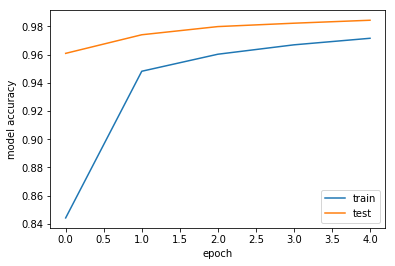

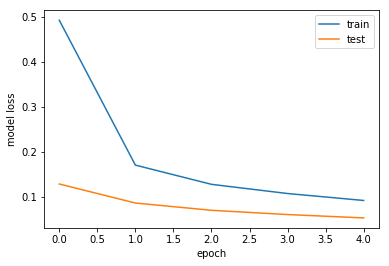

In [36]:
# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

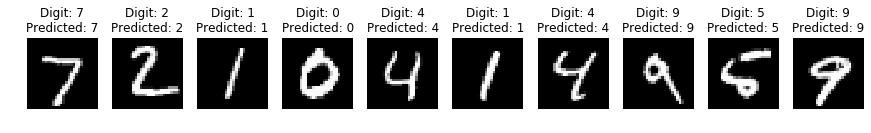

In [37]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_CNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

# Esercizio 12.03

In questo esercizio abbiamo creato delle "nostre" cifre tramite gimp e abbiamo testato con queste il nostro CNN.

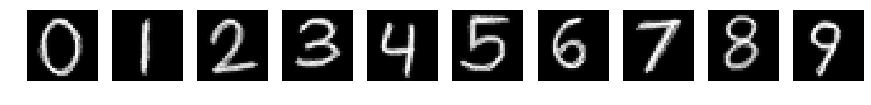

(10, 28, 28)


In [38]:
from PIL import Image
import os

full_data=np.zeros((10,28,28))
plt.figure(figsize=(15,15))

for k in range(10):
    digit_filename = "./"+str(k)+".png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for i in range(xdim):
            data[i,j]=pix[j,i]

    data /= 255
    full_data[k,:,:] = data
    ax = plt.subplot(2, 10, k + 1)    
    plt.imshow(full_data[k, :, :], cmap='gray')       
    plt.axis('off') 
    
plt.imshow(data, cmap='gray')
plt.show()

print(full_data.shape)

(10, 28, 28, 1)


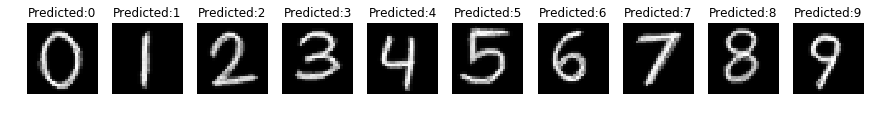

In [39]:
full_data = full_data.reshape(10,xdim,ydim,1)
print(full_data.shape)
pred_0 = model_CNN.predict(full_data)

full_data = full_data.reshape(10,xdim,ydim)
plt.figure(figsize=(15, 15))  

for k in range(10):
    ax = plt.subplot(2, 10, k + 1)    
    plt.imshow(full_data[k, :, :], cmap='gray')    
    plt.title("Predicted:{}".format(np.argmax(pred_0[k])))    
    plt.axis('off') 

plt.show()